### Выгрузка и преобработка

In [205]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [206]:
df = pd.read_csv('result_final.csv')

In [207]:
df.head(5)

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,peak_24h,peak_all_time,platforms,price,rate,reviews_numbers,tags
0,NaN,Free To Play Games,No,639177.0,"21 Dec, 2017",PUBG Corporation,NaN,"English, Korean, Simplified Chinese, French, G...",No,PUBG: BATTLEGROUNDS,710549.0,3236027.0,win,Free To Play,Mixed,2544830.0,Survival/Shooter/Battle Royale/Multiplayer/FPS...
1,NaN,Simulation Games,No,12.0,"5 Jun, 2020",Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,17.0,71.0,win,"64,39zł",Mostly Positive,344.0,Simulation/Early Access/Indie/Physics/Sandbox/...
2,NaN,Free To Play Games,No,6531.0,"6 Mar, 2025",Bad Guitar Studio,NaN,"English, French, German, Japanese, Simplified ...",No,FragPunk,9146.0,113243.0,win,Free To Play,Mostly Positive,36847.0,FPS/Free to Play/Hero Shooter/Action/Team-Base...
3,NaN,Animation & Modeling,Yes,81.0,"10 Oct, 2018",SideFX,NaN,English,No,Houdini Indie,94.0,121.0,"win,mac",NaN,Very Positive,220.0,Animation & Modeling/Game Development/3D/Desig...
4,NaN,Action Games,No,4519.0,"13 Dec, 2023",VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,6723.0,55174.0,win,"169,99zł",Very Positive,182895.0,Tactical/Realistic/FPS/Shooter/Multiplayer/Co-...


In [208]:
df['price'] = (df['price'].str.replace('zł', '', regex=False)).str.replace(',', '.', regex=False)

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])
df['version'] = df.groupby('name')['price'].rank(method='first', ascending=True).astype(int)

<ipython-input-208-d222c9a69b3c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['version'] = df.groupby('name')['price'].rank(method='first', ascending=True).astype(int)


In [209]:
df = df.dropna(subset=['languages']) # что нет ни одной игры не на английском
df['number_of_langs'] = [(len(i.split(','))) for _, i in df['languages'].items()]
df.head(5)

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,peak_24h,peak_all_time,platforms,price,rate,reviews_numbers,tags,version,number_of_langs
1,NaN,Simulation Games,No,12.0,"5 Jun, 2020",Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,17.0,71.0,win,64.39,Mostly Positive,344.0,Simulation/Early Access/Indie/Physics/Sandbox/...,1,1
4,NaN,Action Games,No,4519.0,"13 Dec, 2023",VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,6723.0,55174.0,win,169.99,Very Positive,182895.0,Tactical/Realistic/FPS/Shooter/Multiplayer/Co-...,1,11
6,12+,Indie Games,Yes,68225.0,"26 Feb, 2016",ConcernedApe,NaN,"English, German, Spanish - Spain, Japanese, Po...",No,Stardew Valley,79373.0,236614.0,"win,mac,linux",53.99,Overwhelmingly Positive,750233.0,Farming Sim/Pixel Graphics/Multiplayer/Life Si...,1,12
7,NaN,Racing Games/Assetto Corsa Official Franchise,No,9060.0,"19 Dec, 2014",Kunos Simulazioni,NaN,"English, Italian, Simplified Chinese, Traditio...",No,Assetto Corsa,14464.0,19780.0,win,84.84,Very Positive,116109.0,Racing/Automobile Sim/Simulation/Driving/Multi...,1,4
9,3+,Sports Games/EA Sports Franchise,No,156.0,"6 Apr, 2023",Electronic Arts - Tiburon,NaN,English,No,EA SPORTS™ PGA TOUR™,329.0,1363.0,win,69.90,Mixed,1718.0,Sports/RPG/Co-op/Local Co-Op/Golf/Local Multip...,1,1


In [210]:
# Генерируем категории как признаки
df['category'] = df['category'].fillna('Other')

In [211]:
df['category'] = df['category'].apply(lambda x: x.split('/')).tolist()

In [212]:
df['category']

,category
1,[Simulation Games]
4,[Action Games]
6,[Indie Games]
7,"[Racing Games, Assetto Corsa Official Franchise]"
9,"[Sports Games, EA Sports Franchise]"
...,...
1206,[Simulation Games]
1208,"[Action Games, Stormgate, Downloadable Content]"
1210,"[Action Games, Eugen Systems' Wargame Franchis..."
1211,[Indie Games]


In [213]:
list_of_categories = df['category'].values

cat_concated = []
for tag in list_of_categories:
    cat_concated.extend(tag)

cat_counts = Counter(cat_concated, )

cat_counts

Counter({'Simulation Games': 106,
         'Action Games': 189,
         'Indie Games': 140,
         'Racing Games': 35,
         'Assetto Corsa Official Franchise': 3,
         'Sports Games': 20,
         'EA Sports Franchise': 7,
         'Curve Games Franchise': 4,
         'SC Jogos Franchise': 6,
         'Dai Yong Xiang【alex94i60】 Franchise': 1,
         'Strategy Games': 58,
         'Total War Official Franchise': 2,
         'Need for Speed Franchise': 2,
         'Focus Entertainment Franchise': 1,
         'Liftoff® Franchise': 1,
         'PlayWay S.A. Franchise': 8,
         'NBA 2K Franchise Franchise': 1,
         'ProjectMoon_Official Franchise': 1,
         'Adventure Games': 82,
         'Pine Studio Franchise': 1,
         'SCS Software Franchise': 2,
         'Xbox Game Studios Franchise': 3,
         'Conglomerate 5 Franchise': 2,
         'PikPok Franchise': 1,
         'Car Mechanic Simulator 2021': 1,
         'Downloadable Content': 101,
         'Dead Space 

In [214]:
filtered_cats = [cat for cat, count in cat_counts.items() if count >= 10]

In [215]:
filtered_cats

['Simulation Games',
 'Action Games',
 'Indie Games',
 'Racing Games',
 'Sports Games',
 'Strategy Games',
 'Adventure Games',
 'Downloadable Content',
 'Casual Games',
 'RPG Games',
 'Free To Play Games',
 'Hack and Slash Fury']

In [216]:
df[filtered_cats] = 0

In [217]:
df

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,...,Indie Games,Racing Games,Sports Games,Strategy Games,Adventure Games,Downloadable Content,Casual Games,RPG Games,Free To Play Games,Hack and Slash Fury
1,NaN,[Simulation Games],No,12.0,"5 Jun, 2020",Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,...,0,0,0,0,0,0,0,0,0,0
4,NaN,[Action Games],No,4519.0,"13 Dec, 2023",VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,...,0,0,0,0,0,0,0,0,0,0
6,12+,[Indie Games],Yes,68225.0,"26 Feb, 2016",ConcernedApe,NaN,"English, German, Spanish - Spain, Japanese, Po...",No,Stardew Valley,...,0,0,0,0,0,0,0,0,0,0
7,NaN,"[Racing Games, Assetto Corsa Official Franchise]",No,9060.0,"19 Dec, 2014",Kunos Simulazioni,NaN,"English, Italian, Simplified Chinese, Traditio...",No,Assetto Corsa,...,0,0,0,0,0,0,0,0,0,0
9,3+,"[Sports Games, EA Sports Franchise]",No,156.0,"6 Apr, 2023",Electronic Arts - Tiburon,NaN,English,No,EA SPORTS™ PGA TOUR™,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,NaN,[Simulation Games],No,NaN,May 2025,Tim Lewis,NaN,English,No,Sorter (Early Access),...,0,0,0,0,0,0,0,0,0,0
1208,NaN,"[Action Games, Stormgate, Downloadable Content]",No,NaN,"30 Jul, 2024",Frost Giant Studios,NaN,"English, French, German, Korean, Portuguese - ...",No,Stormgate: Ultimate Early Access Pack,...,0,0,0,0,0,0,0,0,0,0
1210,NaN,"[Action Games, Eugen Systems' Wargame Franchis...",No,NaN,"22 May, 2024",Eugen Systems,NaN,"English, French, German, Spanish - Spain, Russ...",No,WARNO - Early Access Pack,...,0,0,0,0,0,0,0,0,0,0
1211,NaN,[Indie Games],No,NaN,"8 Nov, 2017",Sector-K Games,NaN,English,No,Punch Planet - Early Access,...,0,0,0,0,0,0,0,0,0,0


In [218]:
df.columns

Index(['age_rating', 'category', 'cross_platform', 'current_players', 'date',
       'developer', 'file_size', 'languages', 'multiplayer', 'name',
       'peak_24h', 'peak_all_time', 'platforms', 'price', 'rate',
       'reviews_numbers', 'tags', 'version', 'number_of_langs',
       'Simulation Games', 'Action Games', 'Indie Games', 'Racing Games',
       'Sports Games', 'Strategy Games', 'Adventure Games',
       'Downloadable Content', 'Casual Games', 'RPG Games',
       'Free To Play Games', 'Hack and Slash Fury'],
      dtype='object')

In [219]:
def process_row(row):
    cat_list = row['category']
    for cat in cat_list:
        if cat in row:
            row[cat] = 1
    return row

df = df.apply(process_row, axis=1)

In [220]:
df

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,...,Indie Games,Racing Games,Sports Games,Strategy Games,Adventure Games,Downloadable Content,Casual Games,RPG Games,Free To Play Games,Hack and Slash Fury
1,NaN,[Simulation Games],No,12.0,"5 Jun, 2020",Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,...,0,0,0,0,0,0,0,0,0,0
4,NaN,[Action Games],No,4519.0,"13 Dec, 2023",VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,...,0,0,0,0,0,0,0,0,0,0
6,12+,[Indie Games],Yes,68225.0,"26 Feb, 2016",ConcernedApe,NaN,"English, German, Spanish - Spain, Japanese, Po...",No,Stardew Valley,...,1,0,0,0,0,0,0,0,0,0
7,NaN,"[Racing Games, Assetto Corsa Official Franchise]",No,9060.0,"19 Dec, 2014",Kunos Simulazioni,NaN,"English, Italian, Simplified Chinese, Traditio...",No,Assetto Corsa,...,0,1,0,0,0,0,0,0,0,0
9,3+,"[Sports Games, EA Sports Franchise]",No,156.0,"6 Apr, 2023",Electronic Arts - Tiburon,NaN,English,No,EA SPORTS™ PGA TOUR™,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,NaN,[Simulation Games],No,NaN,May 2025,Tim Lewis,NaN,English,No,Sorter (Early Access),...,0,0,0,0,0,0,0,0,0,0
1208,NaN,"[Action Games, Stormgate, Downloadable Content]",No,NaN,"30 Jul, 2024",Frost Giant Studios,NaN,"English, French, German, Korean, Portuguese - ...",No,Stormgate: Ultimate Early Access Pack,...,0,0,0,0,0,1,0,0,0,0
1210,NaN,"[Action Games, Eugen Systems' Wargame Franchis...",No,NaN,"22 May, 2024",Eugen Systems,NaN,"English, French, German, Spanish - Spain, Russ...",No,WARNO - Early Access Pack,...,0,0,0,0,0,1,0,0,0,0
1211,NaN,[Indie Games],No,NaN,"8 Nov, 2017",Sector-K Games,NaN,English,No,Punch Planet - Early Access,...,1,0,0,0,0,0,0,0,0,0


In [221]:
big_company_flag = pd.read_csv('top_popular_compaines')
tag_based_clustering = pd.read_csv('tag_based_clustering')

In [222]:
df['big_developer'] = [i in big_company_flag['Company'].tolist() for _, i in df['developer'].items()]

df['big_developer'] = df['big_developer'].astype(float)

In [223]:
df[df['number_of_langs'] > 100]
df_fixed = df[df['number_of_langs'] < 40]
df_fixed = df_fixed[df_fixed['price'] != 0]
df_fixed = df_fixed[df_fixed['reviews_numbers'] > 70]
df_fixed['age_rating'] = df_fixed['age_rating'].fillna('Not specified')
df_fixed['date'] = pd.to_datetime(df_fixed['date'])
df_fixed['days_since_realease'] = np.abs(df_fixed['date'] - pd.Timestamp.today()).dt.days

In [224]:
df_fixed.isna().sum(axis=0)[df_fixed.isna().sum(axis=0) != 0]

,0
current_players,179
file_size,406
peak_24h,179
peak_all_time,179


Исходя из предварительного анализа признаки такие как количество игроков, пико за 24 часа незначимы.
Однако пик за все время значим. Посмотрим среднюю цену для игр у которых отсутствует этот параметр, и для остальных игр.

In [225]:
print(f"Цена для игр у которых присутствует показатель пиковое число игроков {df_fixed[~df_fixed['peak_all_time'].isna()]['price'].mean()}")
print(f"Цена для игр у которых отсутствует показатель пиковое число игроков {df_fixed[df_fixed['peak_all_time'].isna()]['price'].mean()}")

Цена для игр у которых присутствует показатель пиковое число игроков 117.11453744493392
Цена для игр у которых отсутствует показатель пиковое число игроков 60.7435754189944


Более внимательно посмотрим на распределение этого параметра

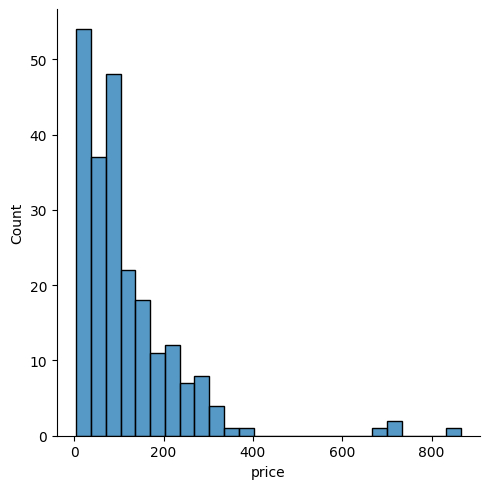

In [226]:
sns.displot(data=df_fixed[~df_fixed['peak_all_time'].isna()], x='price')

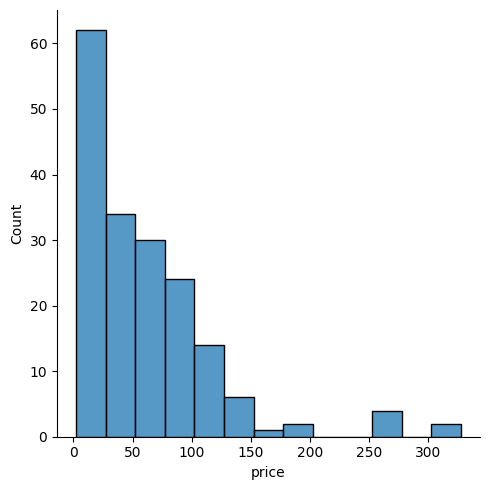

In [227]:
sns.displot(data=df_fixed[df_fixed['peak_all_time'].isna()], x='price')

Видно что распределение в целом похожее, но просто немного сдвинуто влево, явно имеет смысл добавить признак 'отсутсвие пикового онлайна'.

In [228]:
df_fixed['no_peak'] = df_fixed['peak_all_time'].isna().astype(float)


In [229]:
df_fixed['peak_all_time'].fillna(0, inplace = True)

<ipython-input-229-2135923728db>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fixed['peak_all_time'].fillna(0, inplace = True)


In [230]:
df_fixed['lg_price'] = np.log(df_fixed['price'])

In [231]:
base_features = ['peak_all_time', 'number_of_langs', 'days_since_realease', 'big_developer', 'no_peak']

In [232]:
filtered_cats

['Simulation Games',
 'Action Games',
 'Indie Games',
 'Racing Games',
 'Sports Games',
 'Strategy Games',
 'Adventure Games',
 'Downloadable Content',
 'Casual Games',
 'RPG Games',
 'Free To Play Games',
 'Hack and Slash Fury']

In [233]:
df_fixed

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,...,Adventure Games,Downloadable Content,Casual Games,RPG Games,Free To Play Games,Hack and Slash Fury,big_developer,days_since_realease,no_peak,lg_price
1,Not specified,[Simulation Games],No,12.0,2020-06-05,Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,...,0,0,0,0,0,0,0.0,1798,0.0,4.164958
4,Not specified,[Action Games],No,4519.0,2023-12-13,VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,...,0,0,0,0,0,0,0.0,512,0.0,5.135740
6,12+,[Indie Games],Yes,68225.0,2016-02-26,ConcernedApe,NaN,"English, German, Spanish - Spain, Japanese, Po...",No,Stardew Valley,...,0,0,0,0,0,0,0.0,3359,0.0,3.988799
7,Not specified,"[Racing Games, Assetto Corsa Official Franchise]",No,9060.0,2014-12-19,Kunos Simulazioni,NaN,"English, Italian, Simplified Chinese, Traditio...",No,Assetto Corsa,...,0,0,0,0,0,0,0.0,3793,0.0,4.440767
9,3+,"[Sports Games, EA Sports Franchise]",No,156.0,2023-04-06,Electronic Arts - Tiburon,NaN,English,No,EA SPORTS™ PGA TOUR™,...,0,0,0,0,0,0,0.0,763,0.0,4.247066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Not specified,[Simulation Games],No,NaN,2018-08-16,Immersive VR Education Ltd,NaN,English,No,Titanic VR,...,0,0,0,0,0,0,0.0,2457,1.0,4.276527
1166,Not specified,[Utilities],No,NaN,2018-09-11,SBSoftLab,NaN,"English, Russian",No,fpsVR,...,0,0,0,0,0,0,0.0,2431,1.0,2.889816
1168,Not specified,"[Simulation Games, Big Cheese Studio Franchise]",No,NaN,2021-07-29,GameBoom VR,NaN,"English, French, Italian, German, Spanish - Sp...",No,Cooking Simulator VR,...,0,0,0,0,0,0,0.0,1379,1.0,4.499699
1210,Not specified,"[Action Games, Eugen Systems' Wargame Franchis...",No,NaN,2024-05-22,Eugen Systems,NaN,"English, French, German, Spanish - Spain, Russ...",No,WARNO - Early Access Pack,...,0,1,0,0,0,0,0.0,351,1.0,3.804438


In [234]:
df_fixed

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,...,Adventure Games,Downloadable Content,Casual Games,RPG Games,Free To Play Games,Hack and Slash Fury,big_developer,days_since_realease,no_peak,lg_price
1,Not specified,[Simulation Games],No,12.0,2020-06-05,Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,...,0,0,0,0,0,0,0.0,1798,0.0,4.164958
4,Not specified,[Action Games],No,4519.0,2023-12-13,VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,...,0,0,0,0,0,0,0.0,512,0.0,5.135740
6,12+,[Indie Games],Yes,68225.0,2016-02-26,ConcernedApe,NaN,"English, German, Spanish - Spain, Japanese, Po...",No,Stardew Valley,...,0,0,0,0,0,0,0.0,3359,0.0,3.988799
7,Not specified,"[Racing Games, Assetto Corsa Official Franchise]",No,9060.0,2014-12-19,Kunos Simulazioni,NaN,"English, Italian, Simplified Chinese, Traditio...",No,Assetto Corsa,...,0,0,0,0,0,0,0.0,3793,0.0,4.440767
9,3+,"[Sports Games, EA Sports Franchise]",No,156.0,2023-04-06,Electronic Arts - Tiburon,NaN,English,No,EA SPORTS™ PGA TOUR™,...,0,0,0,0,0,0,0.0,763,0.0,4.247066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Not specified,[Simulation Games],No,NaN,2018-08-16,Immersive VR Education Ltd,NaN,English,No,Titanic VR,...,0,0,0,0,0,0,0.0,2457,1.0,4.276527
1166,Not specified,[Utilities],No,NaN,2018-09-11,SBSoftLab,NaN,"English, Russian",No,fpsVR,...,0,0,0,0,0,0,0.0,2431,1.0,2.889816
1168,Not specified,"[Simulation Games, Big Cheese Studio Franchise]",No,NaN,2021-07-29,GameBoom VR,NaN,"English, French, Italian, German, Spanish - Sp...",No,Cooking Simulator VR,...,0,0,0,0,0,0,0.0,1379,1.0,4.499699
1210,Not specified,"[Action Games, Eugen Systems' Wargame Franchis...",No,NaN,2024-05-22,Eugen Systems,NaN,"English, French, German, Spanish - Spain, Russ...",No,WARNO - Early Access Pack,...,0,1,0,0,0,0,0.0,351,1.0,3.804438


### Пробные модели

In [235]:
X = df_fixed[base_features + filtered_cats]
y = df_fixed['lg_price']

X = sm.add_constant(X)

model = sm.OLS(y, X)


result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               lg_price   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     9.394
Date:                Thu, 08 May 2025   Prob (F-statistic):           6.94e-19
Time:                        16:23:17   Log-Likelihood:                -542.04
No. Observations:                 406   AIC:                             1116.
Df Residuals:                     390   BIC:                             1180.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.1737 

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


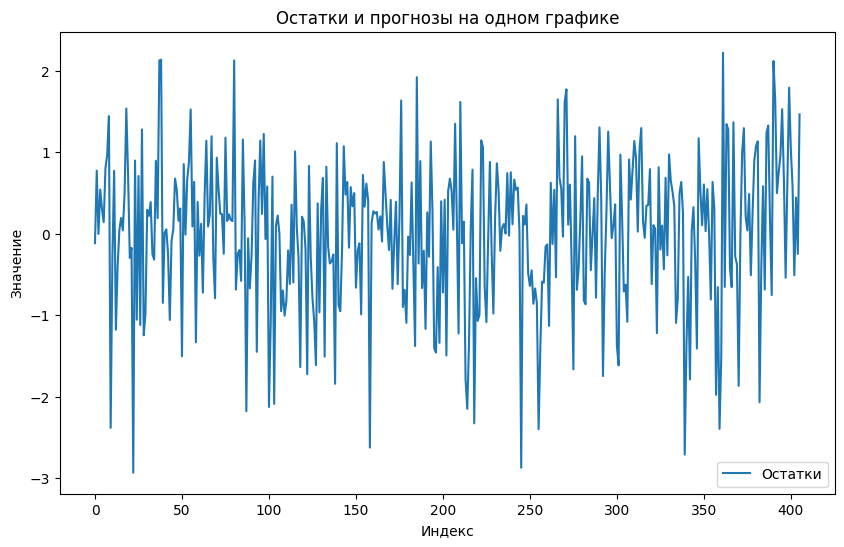

In [236]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(df_fixed['lg_price'])), y = result.resid, label='Остатки')

plt.legend()
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.title('Остатки и прогнозы на одном графике')
plt.show()

In [237]:
df_fixed['pred'] = result.predict()

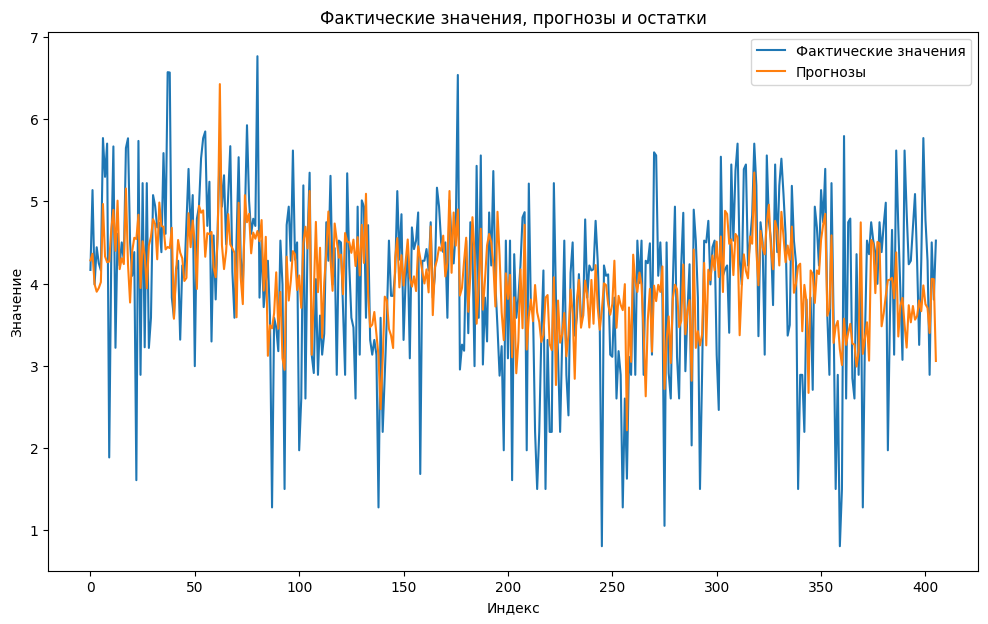

In [238]:
plt.figure(figsize=(12, 7))

x = range(len(df_fixed['lg_price']))

sns.lineplot(x=x, y=df_fixed['lg_price'], label='Фактические значения')

sns.lineplot(x=x, y=df_fixed['pred'], label='Прогнозы')

plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.title('Фактические значения, прогнозы и остатки')
plt.legend()
plt.show()

In [239]:
df_final = df_fixed.merge(tag_based_clustering, how = 'left', left_on = 'name', right_on = 'game')

df_final.shape

(406, 39)

In [240]:
cluster_ohe = pd.get_dummies(df_final['cluster_name'])
df_final = pd.concat([df_final, cluster_ohe], axis=1)

In [241]:
ohe_cols = df_final.columns[-9:]

df_final[ohe_cols] = df_final[ohe_cols].astype(float)

In [242]:
X = df_final[base_features + filtered_cats + ohe_cols.tolist()]
y = df_final['lg_price']

X = sm.add_constant(X)

model = sm.OLS(y, X)


result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               lg_price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     6.217
Date:                Thu, 08 May 2025   Prob (F-statistic):           1.98e-16
Time:                        16:23:18   Log-Likelihood:                -537.57
No. Observations:                 406   AIC:                             1125.
Df Residuals:                     381   BIC:                             1225.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [243]:
import pandas as pd
coef_table = pd.DataFrame({
    'coef': result.params,
    'p-value': result.pvalues
})
print(coef_table)


                                                            coef       p-value
const                                               4.274795e+00  3.057384e-41
peak_all_time                                       1.389815e-06  1.589897e-02
number_of_langs                                     1.602281e-02  2.390163e-02
days_since_realease                                -1.273454e-04  3.521108e-05
big_developer                                       4.230352e-01  7.533293e-02
no_peak                                            -5.111653e-01  3.845676e-06
Simulation Games                                    3.120597e-01  2.628453e-01
Action Games                                        1.841908e-02  9.454126e-01
Indie Games                                        -2.809212e-01  3.124997e-01
Racing Games                                       -3.100904e-02  9.280465e-01
Sports Games                                       -2.251985e-01  5.595977e-01
Strategy Games                                      

In [244]:
rs = coef_table[coef_table['p-value'] < 0.3].index

In [245]:
rs = rs.drop('Hack and Slash Fury') #Нулевая константа лмао

In [246]:
X = df_final[base_features + filtered_cats + ohe_cols.tolist()]
y = df_final['lg_price']

X = sm.add_constant(X)
X = X[rs].drop(columns='Free To Play Games')

model = sm.OLS(y, X)


result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               lg_price   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     11.85
Date:                Thu, 08 May 2025   Prob (F-statistic):           1.66e-20
Time:                        16:23:18   Log-Likelihood:                -541.97
No. Observations:                 406   AIC:                             1110.
Df Residuals:                     393   BIC:                             1162.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [247]:
df_final['pred'] = result.predict()

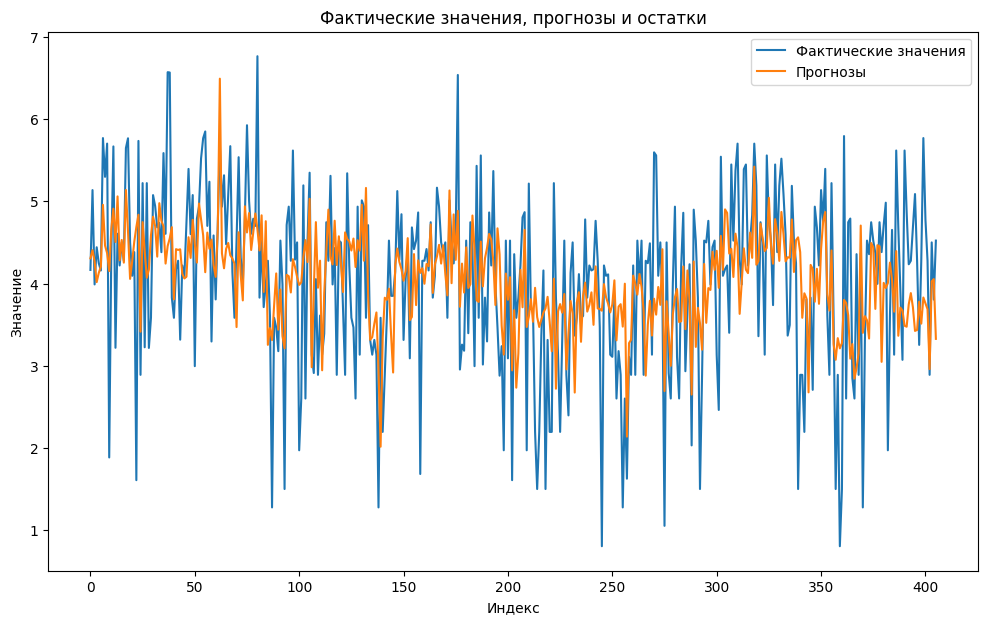

In [248]:
plt.figure(figsize=(12, 7))

x = range(len(df_final['lg_price']))

sns.lineplot(x=x, y=df_final['lg_price'], label='Фактические значения')

sns.lineplot(x=x, y=df_final['pred'], label='Прогнозы')

plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.title('Фактические значения, прогнозы и остатки')
plt.legend()
plt.show()

Text(0, 0.5, 'Остатки')

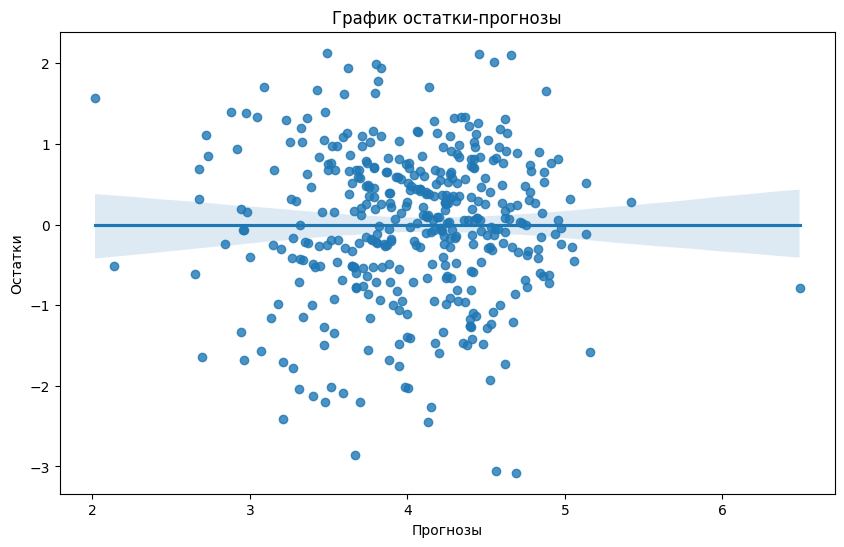

In [249]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x = result.predict(X), y=y - result.predict(X), ax=ax)
ax.set_title("График остатки-прогнозы")
ax.set_xlabel("Прогнозы")
ax.set_ylabel("Остатки")

### Выбросы:

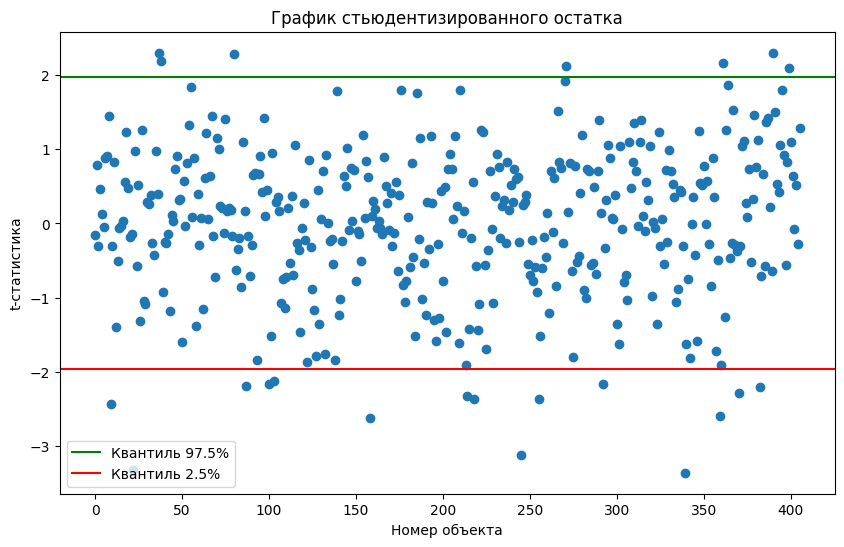

In [250]:
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy.stats import t

inf = OLSInfluence(result)
resis_stud = inf.resid_studentized_internal
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.arange(len(y)), resis_stud)
ax.axhline(t.ppf(0.975, len(y) - 4), label = "Квантиль 97.5%", color='g')
ax.axhline(-t.ppf(0.975, len(y) - 4), label = "Квантиль 2.5%", color='r')
ax.set_title("График cтьюдентизированного остатка")
ax.set_xlabel("Номер объекта")
ax.set_ylabel("t-статистика")
ax.legend()

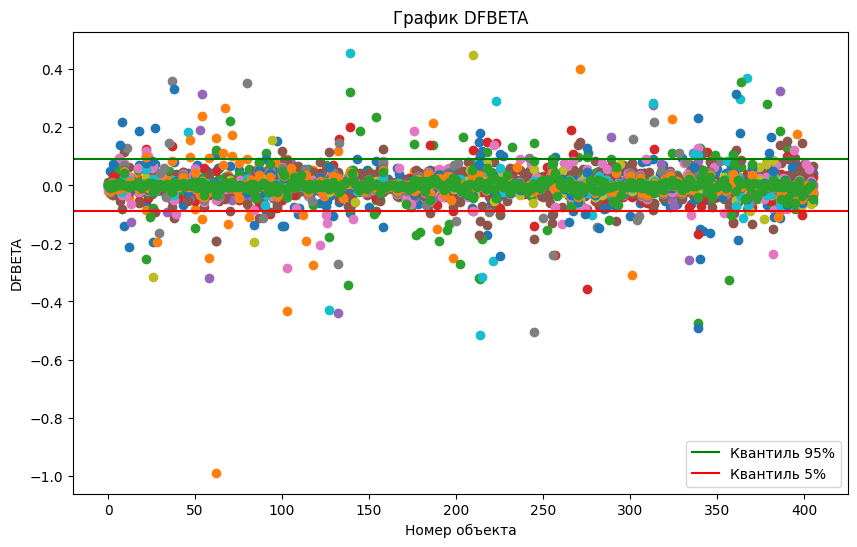

In [251]:
dfbetas = inf.dfbetas
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(dfbetas.shape[1]):
  ax.scatter(np.arange(len(y)), dfbetas[:,i])
ax.axhline(np.percentile(dfbetas, 97.5), label = "Квантиль 95%", color='g')
ax.axhline(np.percentile(dfbetas, 2.5), label = "Квантиль 5%", color='r')
ax.set_title("График DFBETA")
ax.set_xlabel("Номер объекта")
ax.set_ylabel("DFBETA")
ax.legend()

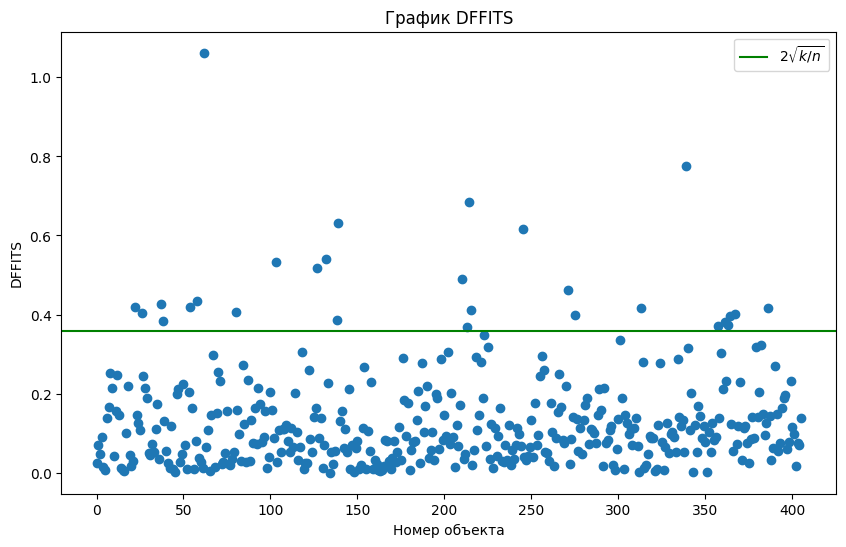

In [252]:
dffits, thr = inf.dffits
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.arange(len(y)), np.abs(dffits))
ax.axhline(thr, label = "$2\sqrt{k/n}$", color='g')
ax.set_title("График DFFITS")
ax.set_xlabel("Номер объекта")
ax.set_ylabel("DFFITS")
ax.legend()

### Итоговая модель

In [253]:
df_fixed = df_final[(resis_stud < t.ppf(0.975, len(y) - 4)) & (resis_stud > -t.ppf(0.975, len(y) - 4)) & (np.abs(dffits) < thr)]

In [254]:
X = df_fixed[base_features + filtered_cats + ohe_cols.tolist()]
y = df_fixed['lg_price']

X = sm.add_constant(X)
X = X[rs].drop(columns='Free To Play Games')

In [255]:
model = sm.OLS(y, X)


result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               lg_price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     15.37
Date:                Thu, 08 May 2025   Prob (F-statistic):           4.64e-26
Time:                        16:23:20   Log-Likelihood:                -400.83
No. Observations:                 366   AIC:                             827.7
Df Residuals:                     353   BIC:                             878.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

### Эндогенность

In [256]:
!pip install linearmodels

In [257]:
from linearmodels.iv import IV2SLS
from linearmodels.iv.results import compare

model_iv = IV2SLS(dependent = y,
            exog = X.drop(columns=['peak_all_time', 'no_peak']),
            endog = X[['peak_all_time', 'no_peak']],
            instruments = df_fixed[['**Competitive & Tactical Multiplayer Hybrids with Card, Shooter, and Strategy Elements**', 'Action Games', '**Open-Ended Simulation and Sandbox Crafting Games with Physics and Survival Elements**']]).fit()

In [258]:
model_iv.wu_hausman(['peak_all_time', 'no_peak'])

Wu-Hausman test of exogeneity
H0: Variables peak_all_time, no_peak are exogenous
Statistic: 0.8801
P-value: 0.4156
Distributed: F(2,351)
WaldTestStatistic, id: 0x7a8ccf3337d0

In [259]:
print(model_iv.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               lg_price   R-squared:                     -0.1735
Estimator:                    IV-2SLS   Adj. R-squared:                -0.2134
No. Observations:                 366   F-statistic:                    91.417
Date:                Thu, May 08 2025   P-value (F-stat)                0.0000
Time:                        16:23:23   Distribution:                 chi2(12)
Cov. Estimator:                robust                                         
                                                                              
                                                               Parameter Estimates                                                                
                                                                                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------

### Рандомное предсказание

In [260]:
data = pd.DataFrame({
    "name": 'Bubble Jump',
    "const": [1],
    "peak_all_time": [1200],          # Максимальный пик игроков (1,200)
    "number_of_langs": [2],          # 2 языков локализации
    "days_since_realease": [30],       # 30 дней с момента релиза
    "big_developer": [0],             # Инди-разработчик (0 = не крупный)
    "no_peak": [1],                   # Отсутствие массового хайпа (1 = да)
    "Simulation Games": [1],          # Элементы симулятора
    "Strategy Games": [0],            # Не стратегия
    "Downloadable Content": [0],      # Нет DLC на старте
    "Casual Games": [1],              # Казуальный жанр
    "**Casual Physics-Based Racing and Party Games with VR and Co-Op Elements**": [0],  # Не относится
    "**Fast-Paced Combat and Multiplayer-Focused Action RPGs with Varied Settings**": [0],  # Не относится
    "**Retro-Inspired Indie Hybrid Arcade Games**": [0]  # Не ретро-аркада
})
result.predict(data[rs.drop('Free To Play Games')])

,0
0,3.562552


### Нормальность остатков

In [261]:
# Импорт библиотек
from scipy import stats
import numpy as np

stat, p_value = stats.shapiro(result.resid)

# Вывод результатов
print(f"Статистика теста: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Интерпретация
alpha = 0.05
if p_value > alpha:
    print("Не отвергаем нулевую гипотезу: остатки выглядят нормально распределенными (p > 0.05)")
else:
    print("Отвергаем нулевую гипотезу: остатки НЕ нормально распределены (p ≤ 0.05)")

Статистика теста: 0.9890
p-value: 0.0076
Отвергаем нулевую гипотезу: остатки НЕ нормально распределены (p ≤ 0.05)


Text(0.5, 9.444444444444438, 'Residual')

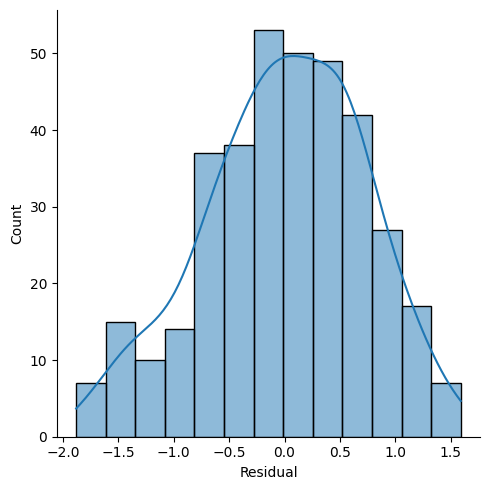

In [262]:
sns.displot(x = result.resid, kde=True)
plt.xlabel('Residual')

### Мультиколлинеарность

In [263]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns)

,0
const,6.299699
peak_all_time,1.227082
number_of_langs,1.144401
days_since_realease,1.058597
big_developer,1.035678
no_peak,1.262277
Simulation Games,1.097759
Strategy Games,1.061546
Downloadable Content,1.112015
Casual Games,1.044494


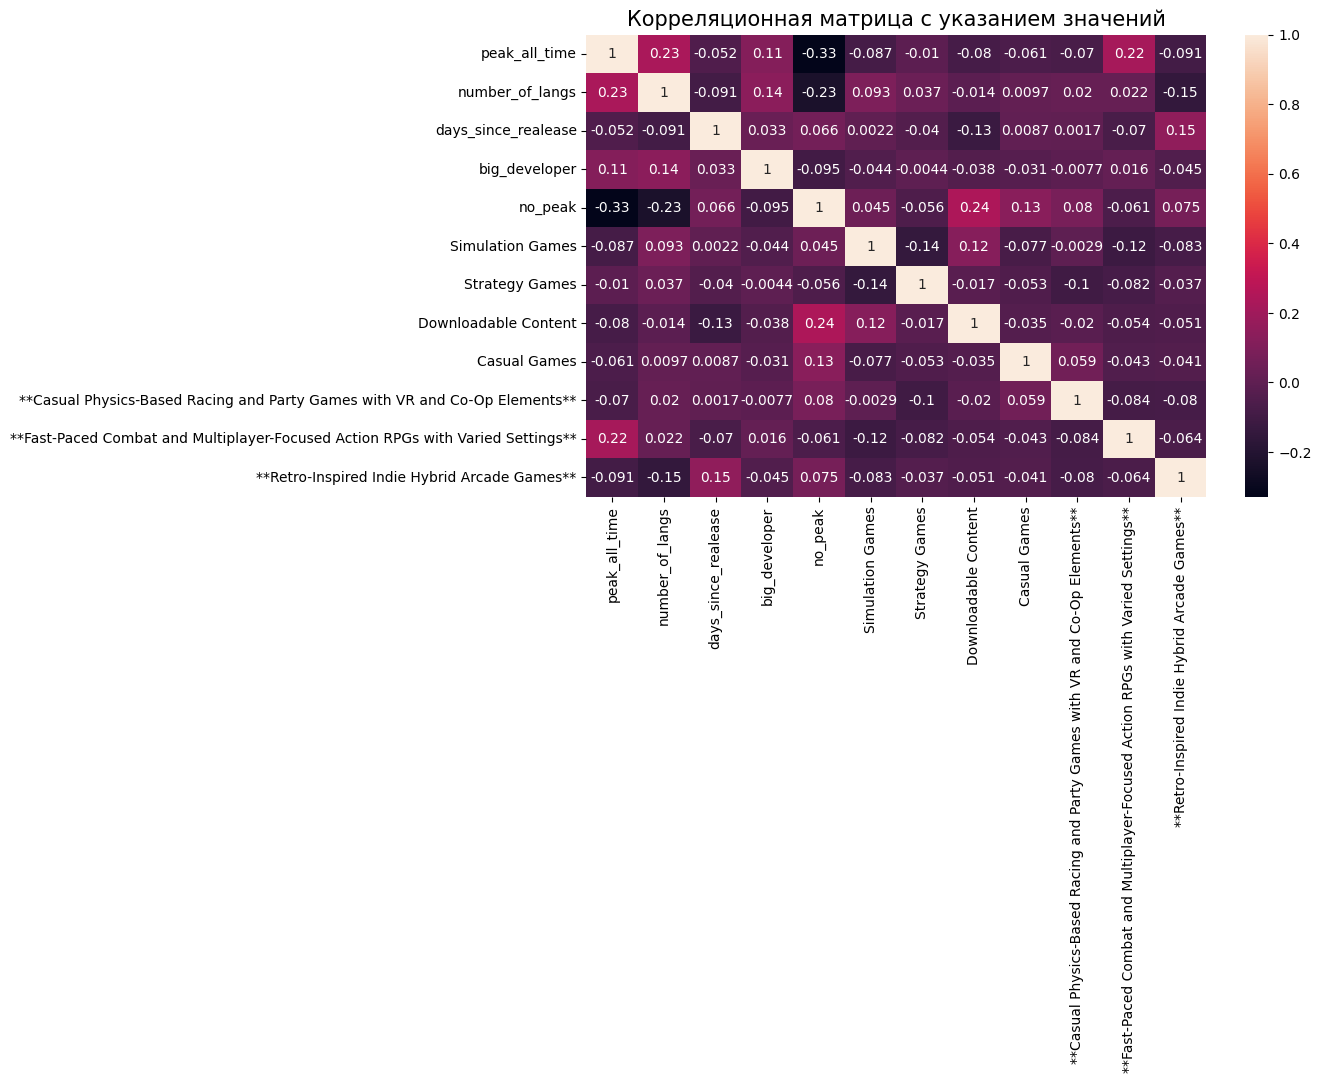

In [264]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(data=X.drop(columns='const').corr(), ax=ax, annot=True)
ax.set_title('Корреляционная матрица с указанием значений', fontsize=15);

In [265]:
X.drop(columns='const').corr()

,peak_all_time,number_of_langs,days_since_realease,big_developer,no_peak,Simulation Games,Strategy Games,Downloadable Content,Casual Games,**Casual Physics-Based Racing and Party Games with VR and Co-Op Elements**,**Fast-Paced Combat and Multiplayer-Focused Action RPGs with Varied Settings**,**Retro-Inspired Indie Hybrid Arcade Games**
peak_all_time,1.000000,0.231775,-0.051632,0.114601,-0.327941,-0.086617,-0.010023,-0.079542,-0.060791,-0.069874,0.218584,-0.090623
number_of_langs,0.231775,1.000000,-0.090864,0.135074,-0.230157,0.093104,0.036502,-0.014087,0.009690,0.020151,0.021844,-0.148972
days_since_realease,-0.051632,-0.090864,1.000000,0.033216,0.065502,0.002206,-0.039538,-0.125321,0.008686,0.001674,-0.070379,0.151097
big_developer,0.114601,0.135074,0.033216,1.000000,-0.094764,-0.044365,-0.004391,-0.038061,-0.030858,-0.007698,0.015547,-0.045424
no_peak,-0.327941,-0.230157,0.065502,-0.094764,1.000000,0.044745,-0.055751,0.242549,0.128747,0.080419,-0.061064,0.075294
Simulation Games,-0.086617,0.093104,0.002206,-0.044365,0.044745,1.000000,-0.144918,0.122525,-0.077155,-0.002940,-0.119207,-0.082647
Strategy Games,-0.010023,0.036502,-0.039538,-0.004391,-0.055751,-0.144918,1.000000,-0.016959,-0.052761,-0.102366,-0.081518,-0.036648
Downloadable Content,-0.079542,-0.014087,-0.125321,-0.038061,0.242549,0.122525,-0.016959,1.000000,-0.034647,-0.020359,-0.053531,-0.051003
Casual Games,-0.060791,0.009690,0.008686,-0.030858,0.128747,-0.077155,-0.052761,-0.034647,1.000000,0.059483,-0.043400,-0.041350
**Casual Physics-Based Racing and Party Games with VR and Co-Op Elements**,-0.069874,0.020151,0.001674,-0.007698,0.080419,-0.002940,-0.102366,-0.020359,0.059483,1.000000,-0.084205,-0.080227


### Гомоскедастичность

In [266]:
from statsmodels.stats.diagnostic import het_white
het_white(result.resid, X)

(np.float64(58.49804638793079),
 np.float64(0.5671320233659138),
 np.float64(0.9480630745534113),
 np.float64(0.5880932642461615))

In [267]:
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(result.resid, X)

(np.float64(18.73298988328103),
 np.float64(0.09517916416628233),
 np.float64(1.586854215957055),
 np.float64(0.09329156334112419))

### Рамсей

In [268]:
from statsmodels.stats.diagnostic import linear_reset
linear_reset(result, power=2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=0.037241598255788565, p-value=0.8469739863861011, df_denom=1>

### Бокс-Кокс

In [269]:
from scipy.stats import gmean # Тест бокса кокса по заребке
y_zar = df_fixed['price']
y_mean = gmean(y)
y_zar = y_zar/y_mean

In [270]:
y_lin = y_zar
mod = sm.OLS(y_lin, X)
res = mod.fit()
rss_1 = np.square(res.resid).sum()

In [271]:
y_log = np.log(y_zar)
mod = sm.OLS(y_log, X)
res = mod.fit()
rss_2 = np.square(res.resid).sum()

In [272]:
xi = abs(y.shape[0]/2*np.log(rss_1/rss_2))
critical = 3.84
print(xi)
print(xi < critical) # Пикаем с меньшим RSS

1143.8474793501925
False


In [273]:
from scipy.stats import chi2


# Calculate p-value
p_value = chi2.sf(xi, 1)
print(f"P-value: {p_value:.4f}")

P-value: 0.0000


In [274]:
rss_1 > rss_2 # пикаем  логарифм

np.True_

In [275]:
(rss_1, rss_2)

(np.float64(99272.15301127292), np.float64(191.53828374199435))

### Инструментальные приколы

In [276]:
df_fixed.columns

Index(['age_rating', 'category', 'cross_platform', 'current_players', 'date',
       'developer', 'file_size', 'languages', 'multiplayer', 'name',
       'peak_24h', 'peak_all_time', 'platforms', 'price', 'rate',
       'reviews_numbers', 'tags', 'version', 'number_of_langs',
       'Simulation Games', 'Action Games', 'Indie Games', 'Racing Games',
       'Sports Games', 'Strategy Games', 'Adventure Games',
       'Downloadable Content', 'Casual Games', 'RPG Games',
       'Free To Play Games', 'Hack and Slash Fury', 'big_developer',
       'days_since_realease', 'no_peak', 'lg_price', 'pred', 'Unnamed: 0',
       'game', 'cluster_name',
       '**Anime-Inspired Indie Visual Novels and Niche Genre Hybrids**',
       '**Casual Physics-Based Racing and Party Games with VR and Co-Op Elements**',
       '**Competitive & Tactical Multiplayer Hybrids with Card, Shooter, and Strategy Elements**',
       '**Fast-Paced Combat and Multiplayer-Focused Action RPGs with Varied Settings**',
       '

In [277]:
filt = ['age_rating', 'category', 'cross_platform', 'date', 'developer', 'languages', 'multiplayer', 'name', 'platforms', 'rate', 'tags', 'game', 'cluster_name', 'file_size', 'version',
        'Free To Play Games', 'Hack and Slash Fury', 'price', 'pred', 'Unnamed: 0']

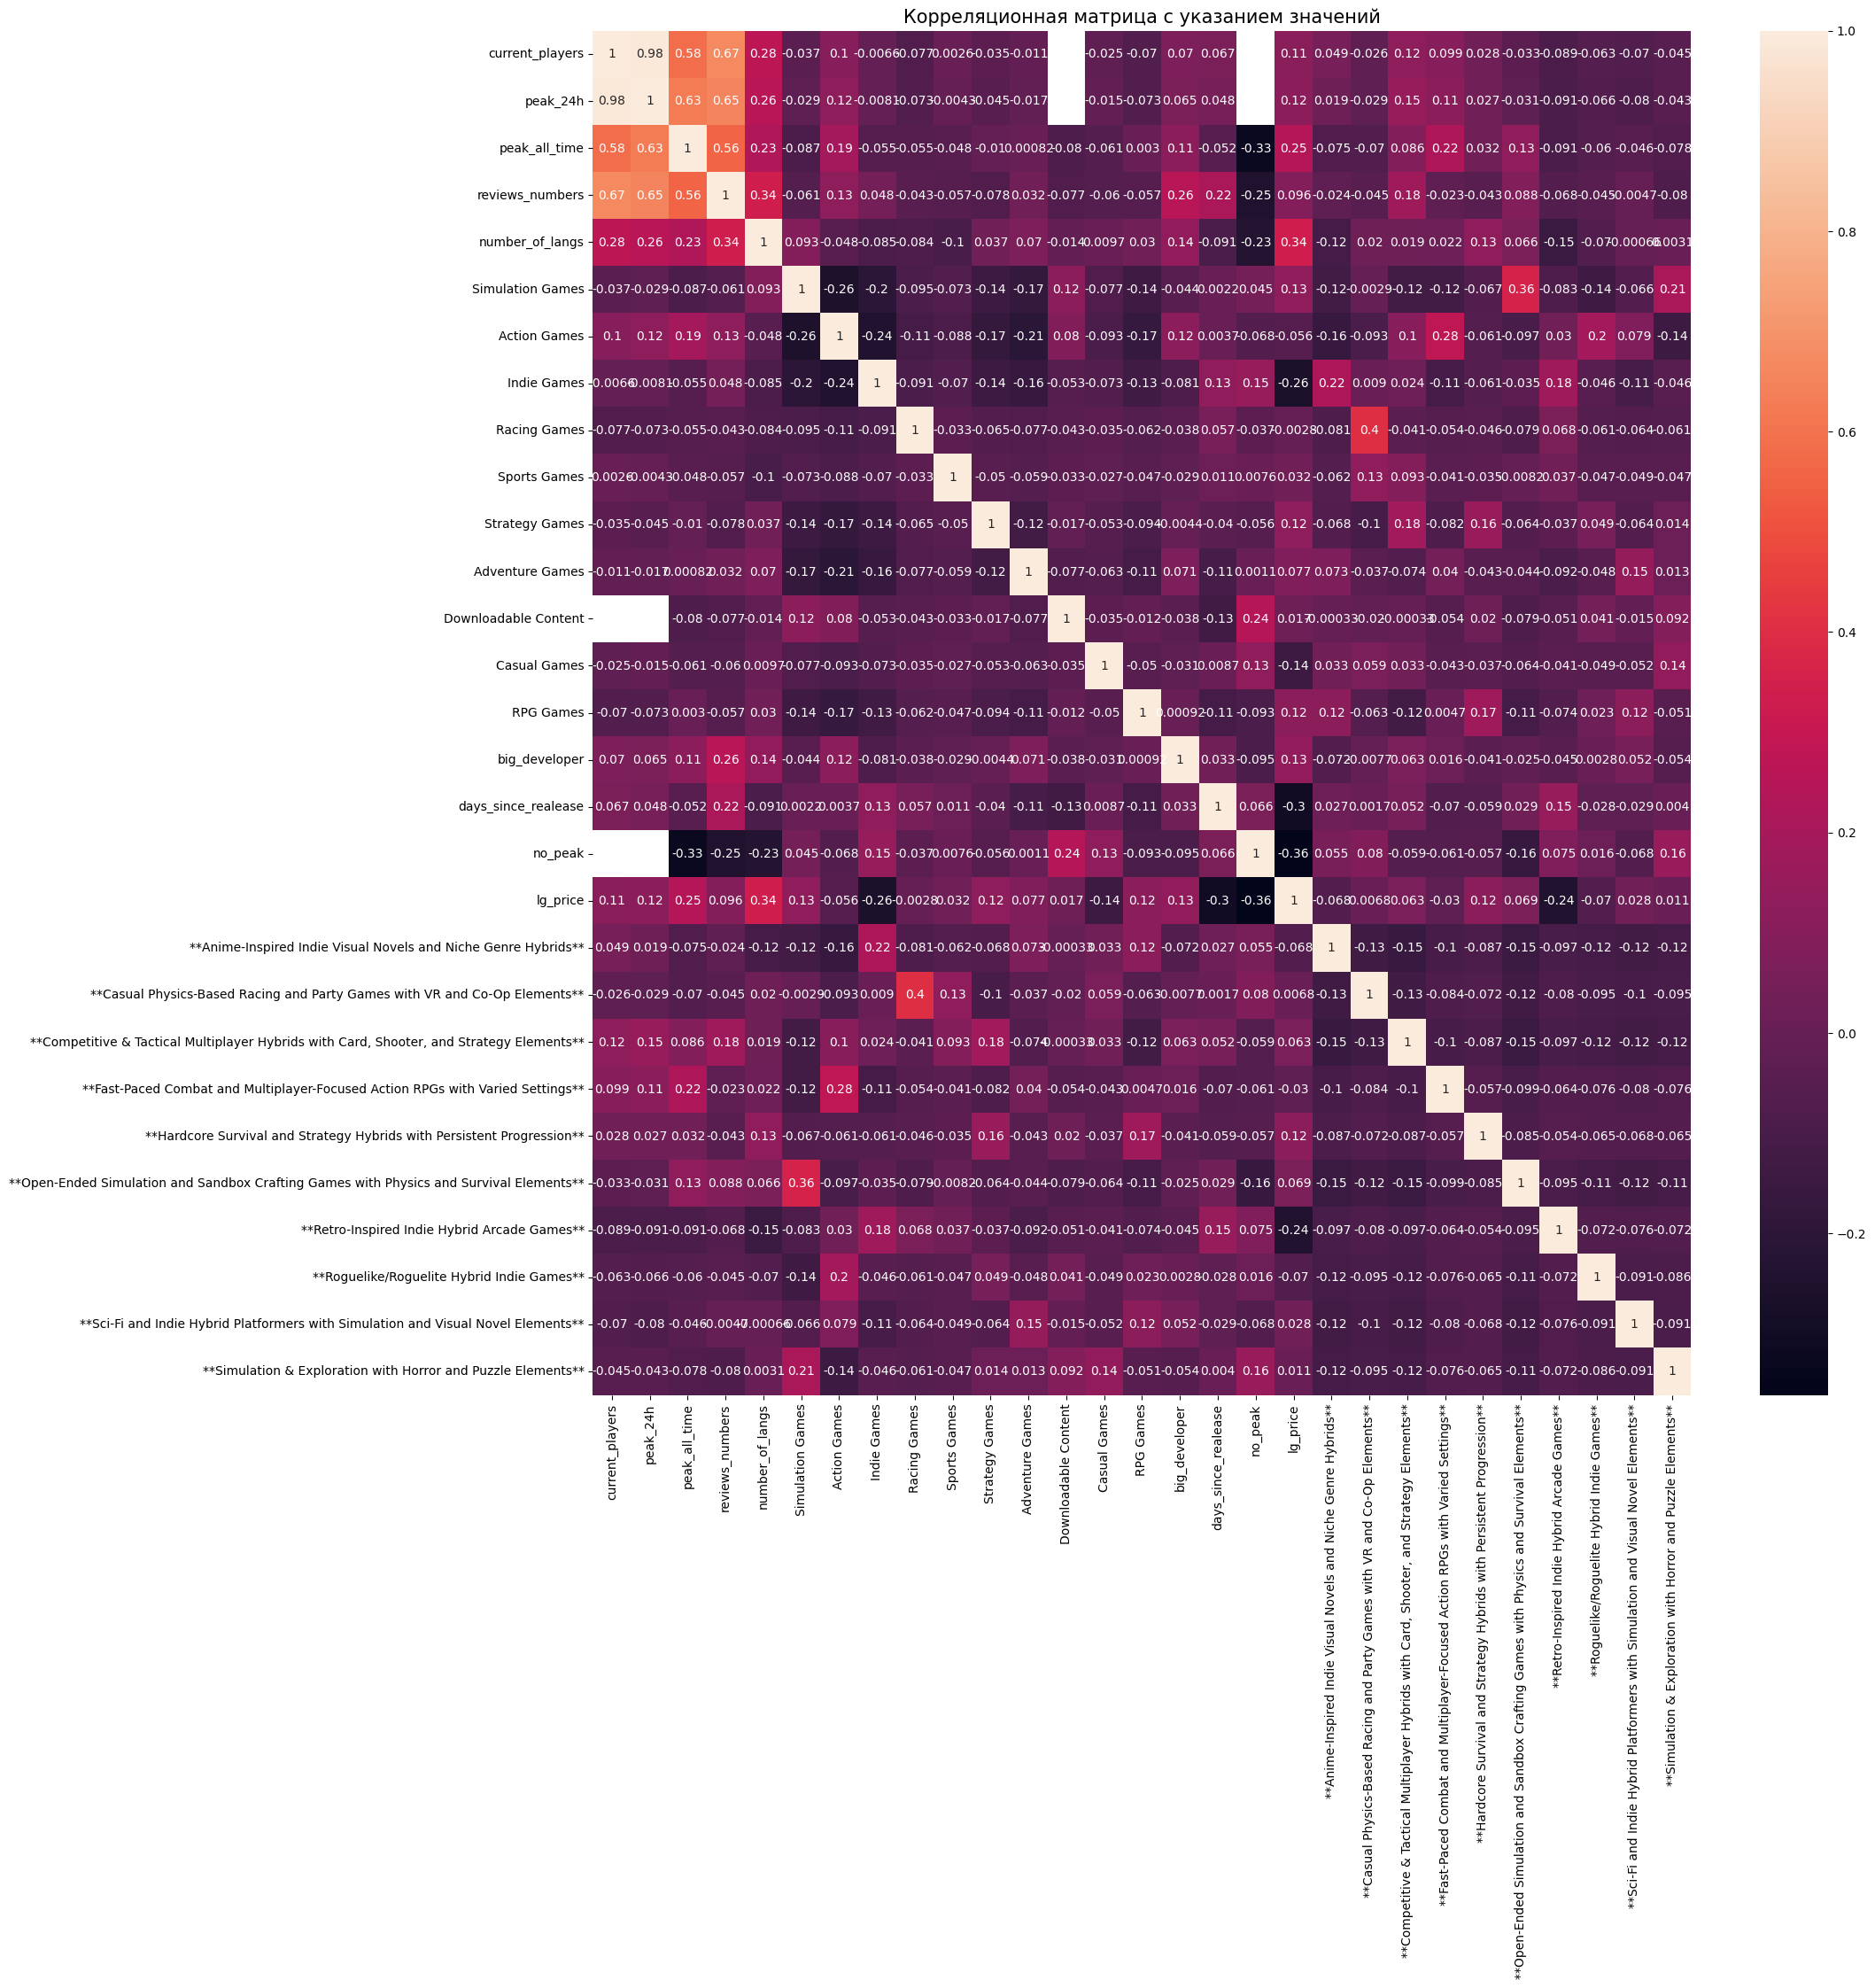

In [278]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(data=df_fixed.drop(columns=filt).corr(), ax=ax, annot=True)
ax.set_title('Корреляционная матрица с указанием значений', fontsize=15);